In [2]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
# from scipy import misc



/Users/laurenstein/opt/anaconda3/envs/image/lib/python3.7/importlib/__init__.py:127: UserWarning: Viewer requires Qt
  return _bootstrap._gcd_import(name[level:], package, level)


In [3]:
>>> import skimage.io as io
>>> io.find_available_plugins()
{'gtk': ['imshow'],
 'matplotlib': ['imshow', 'imread', 'imread_collection'],
 'pil': ['imread', 'imsave', 'imread_collection'],
 'test': ['imsave', 'imshow', 'imread', 'imread_collection'],}

{'gtk': ['imshow'],
 'matplotlib': ['imshow', 'imread', 'imread_collection'],
 'pil': ['imread', 'imsave', 'imread_collection'],
 'test': ['imsave', 'imshow', 'imread', 'imread_collection']}

In [4]:
from skimage import io
io.use_plugin('matplotlib')

In [5]:
path = "FF_HR_P2_02_60X_z_02.jpg"

# Pillow

In [6]:
im = Image.open(path)
print(im.width, im.height, im.mode, im.format, type(im))

960 720 RGB JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'>


In [7]:
im.show()

In [8]:
im_g = im.convert("L")
im_g.save("scope_gray.png")
Image.open("scope_gray.png").show()

# Matplotlib

In [9]:
im = mpimg.imread(path)
print(im.shape, im.dtype, type(im))

(720, 960, 3) uint8 <class 'numpy.ndarray'>


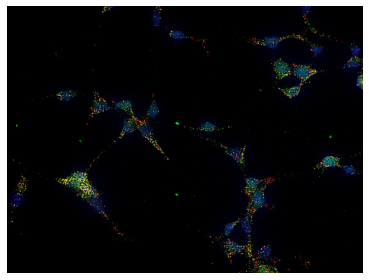

In [10]:
plt.imshow(im)
plt.axis("off") 
plt.tight_layout() 

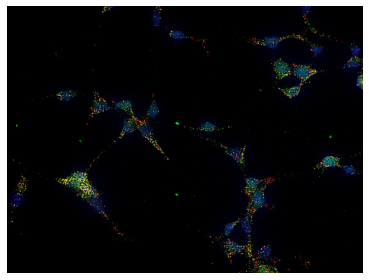

In [11]:
im1 = im
im1[im1 <0.5] = 0
plt.imshow(im)
plt.axis("off") 
plt.tight_layout()
plt.savefig("scope_dark.png")


# Scikit-Image

In [12]:
im = imread(path)
print(im.shape, im.dtype, type(im))

(720, 960, 3) uint8 <class 'numpy.ndarray'>


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


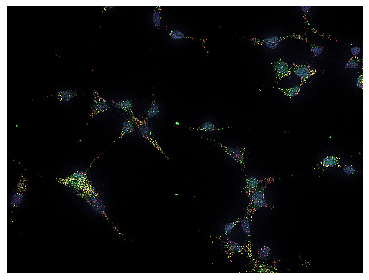

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x7fca3b8d00d0>, None)

In [13]:
hsv = color.rgb2hsv(im)
hsv[:,:,1] = 0.5
im1 = color.hsv2rgb(hsv)
imsave('scope_hsv.png', im1)
im = imread("scope_hsv.png")
plt.axis('off'), imshow(im), show()



In [14]:
# Can't get the popup viewer to work, I think it needs to be set to TKAgg from first block but that is broken as well, never fully loads
# viewer = viewer.ImageViewer(im)
# viewer.show()

In [15]:
data_dir = "G1/G1_A_3/"
coll = io.ImageCollection(data_dir + '*.tif')

In [16]:
coll[0].shape

(1002, 1002, 3)

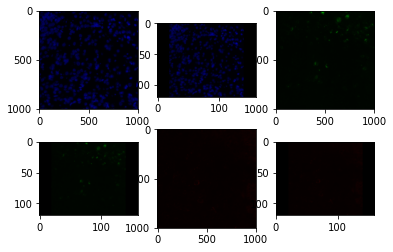

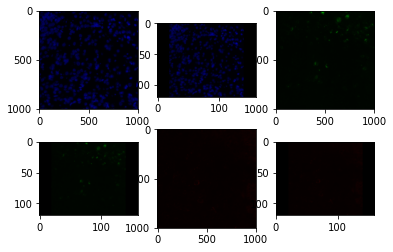

In [18]:
imshow_collection(coll)